Cryptocurrency Volatility prediction

Cryptocurrency markets are highly volatile, and understanding and forecasting this volatility is crucial for
market participants. Volatility refers to the degree of variation in the price of a cryptocurrency over time, and
high volatility can lead to significant risks for traders and investors. Accurate volatility prediction helps in risk
management, portfolio allocation, and developing trading strategies.In this project, you are required to build a machine learning model to predict cryptocurrency volatility levels
based on historical market data such as OHLC (Open, High, Low, Close) prices, trading volume, and market
capitalization. The objective is to anticipate periods of heightened volatility, enabling traders and financial
institutions to manage risks and make informed decisions.

Your final model should provide insights into market stability by forecasting volatility variations, allowing
stakeholders to proactively respond to changing market conditions.

Dataset Information
You will use a dataset that includes historical daily cryptocurrency price, volume, and market capitalization
data for multiple cryptocurrencies.
Dataset:
The dataset consists of daily records for over 50 cryptocurrencies, including features such as date, symbol,
open, high, low, close, volume, and market cap.

Data Preprocessing Require
 Handle missing values and ensure data consistencb
Normalize and scale numerical feature=
Engineer new features related to volatility and liquidity trends

In [ ]:

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.preprocessing import StandardScaler

# ========================================== # Corrected: zip_path
# UNZIP DATASET
zip_path = "/content/dataset.csv.zip" # Corrected path
extract_path = "/mnt/data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV automatically
csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

# ========================================== # Added: Handling for 'symbol' column
# BASIC CLEANING
# ==========================================
df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Start of Fix for KeyError: 'symbol' ---
if 'symbol' not in df.columns:
    if 'crypto_name' in df.columns:
        df.rename(columns={'crypto_name': 'symbol'}, inplace=True)
    elif 'unnamed:_0' in df.columns and df['unnamed:_0'].dtype == 'object' and df['unnamed:_0'].nunique() > 10:
        df.rename(columns={'unnamed:_0': 'symbol'}, inplace=True)
    else:
        # Fallback in case neither 'crypto_name' nor 'unnamed:_0' fit the pattern
        print(f"Warning: 'symbol' column not found or inferred. Available columns: {df.columns.tolist()}")
        # If 'symbol' is truly missing and cannot be inferred, further steps might fail.
        # For now, we'll proceed, but manual intervention might be needed.
        pass
# --- End of Fix ---

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

# Forward fill + drop
df.ffill(inplace=True) # Corrected: Using ffill() directly instead of fillna(method='ffill')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ========================================== # Corrected: market_cap to marketcap
# FEATURE ENGINEERING
# ==========================================
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

df['volatility_7d'] = (
    df.groupby('symbol')['daily_return']
    .rolling(7)
    .std()
    .reset_index(level=0, drop=True)
)

df['hl_range'] = (df['high'] - df['low']) / df['close']
df['volume_change'] = df.groupby('symbol')['volume'].pct_change()
df['market_cap_change'] = df.groupby('symbol')['marketcap'].pct_change() # Corrected here

# ==========================================
# 🔥 CRITICAL FIX (Infinity Handling)
# ==========================================
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# ========================================== # Corrected: market_cap to marketcap
# FEATURE SCALING (SAFE)
# ==========================================
features_to_scale = [
    'open', 'high', 'low', 'close',
    'volume', 'marketcap', # Corrected here
    'hl_range', 'volume_change', 'market_cap_change'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# FINAL CHECK

print(" Preprocessing completed successfully!")
print("Final shape:", df.shape)
print(df.head())


 Preprocessing completed successfully!
Final shape: (69669, 15)
       unnamed:_0      open      high       low     close    volume  \
45010       45010 -0.158420 -0.157641 -0.158132 -0.157928 -0.234931   
45028       45028 -0.157848 -0.156945 -0.157474 -0.157494 -0.234905   
45120       45120 -0.157414 -0.156936 -0.157086 -0.157396 -0.234944   
45155       45155 -0.157315 -0.156397 -0.157078 -0.156913 -0.234877   
45191       45191 -0.156832 -0.155842 -0.156915 -0.157122 -0.234873   

       marketcap                 timestamp symbol       date  daily_return  \
45010  -0.198099  2020-10-09T23:59:59.999Z   Aave 2020-10-09      0.069766   
45028  -0.197947  2020-10-10T23:59:59.999Z   Aave 2020-10-10      0.049468   
45120  -0.197912  2020-10-11T23:59:59.999Z   Aave 2020-10-11      0.010726   
45155  -0.197743  2020-10-12T23:59:59.999Z   Aave 2020-10-12      0.051912   
45191  -0.197816  2020-10-13T23:59:59.999Z   Aave 2020-10-13     -0.021332   

       volatility_7d  hl_range  volume_c

In [ ]:
#Data Collection: Gather historical OHLC, volume, and market cap data from the provided dataset
# ------------------------------------
# Data Collection: Load Crypto Dataset
# ------------------------------------
import pandas as pd
import zipfile
import os

# Path to uploaded ZIP file
zip_path = "/content/dataset.csv.zip" # Corrected path
extract_path = "/mnt/data/"

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV file automatically
csv_file = None
for file in os.listdir(extract_path):
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found inside the ZIP.")

# Load dataset
csv_path = os.path.join(extract_path, csv_file)
df = pd.read_csv(csv_path)

# Display basic info
print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

Dataset loaded successfully!
Shape: (72946, 10)
   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  


In [ ]:
#  Data Preprocessing: Handle missing values, clean data, and normalize numerical feature
# ------------------------------------
# Data Preprocessing
# ------------------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Start of Fix for KeyError: 'symbol' ---
if 'symbol' not in df.columns:
    if 'crypto_name' in df.columns:
        df.rename(columns={'crypto_name': 'symbol'}, inplace=True)
    elif 'unnamed:_0' in df.columns and df['unnamed:_0'].dtype == 'object' and df['unnamed:_0'].nunique() > 10:
        df.rename(columns={'unnamed:_0': 'symbol'}, inplace=True)
    else:
        print(f"Warning: 'symbol' column not found or inferred. Available columns: {df.columns.tolist()}")
# --- End of Fix ---

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort data by symbol and date (time-series consistency)
df = df.sort_values(by=['symbol', 'date'])

# -------------------------------
# 1. Handle Missing Values
# -------------------------------
# Forward fill for time-series data
df.ffill(inplace=True)

# Drop remaining missing values
df.dropna(inplace=True)

# Remove duplicate records
df.drop_duplicates(inplace=True)

# -------------------------------
# 2. Clean Invalid Values
# -------------------------------
# Replace infinity values with NaN and drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# -------------------------------
# 3. Normalize Numerical Features
# -------------------------------
numerical_features = [
    'open', 'high', 'low', 'close',
    'volume', 'marketcap' # Corrected: market_cap to marketcap
]

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# -------------------------------
# Final Check
# -------------------------------
print("Data preprocessing completed successfully!")
print("Dataset shape after preprocessing:", df.shape)
print(df.head())



Data preprocessing completed successfully!
Dataset shape after preprocessing: (72946, 10)
       unnamed:_0      open      high       low     close    volume  \
44644       44644 -0.166334 -0.165950 -0.166175 -0.166323 -0.229533   
44709       44709 -0.166234 -0.153949 -0.166072 -0.156269 -0.229533   
44780       44780 -0.156169 -0.155845 -0.156195 -0.156360 -0.229533   
44826       44826 -0.156265 -0.155837 -0.156373 -0.156256 -0.229533   
44843       44843 -0.156147 -0.156154 -0.158155 -0.158323 -0.229472   

       marketcap                 timestamp symbol       date  
44644  -0.196627  2020-10-02T23:59:59.999Z   Aave 2020-10-02  
44709  -0.196627  2020-10-03T23:59:59.999Z   Aave 2020-10-03  
44780  -0.196627  2020-10-04T23:59:59.999Z   Aave 2020-10-04  
44826  -0.195439  2020-10-05T23:59:59.999Z   Aave 2020-10-05  
44843  -0.195681  2020-10-06T23:59:59.999Z   Aave 2020-10-06  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 72946 entries, 44644 to 72945
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unnamed:_0  72946 non-null  int64         
 1   open        72946 non-null  float64       
 2   high        72946 non-null  float64       
 3   low         72946 non-null  float64       
 4   close       72946 non-null  float64       
 5   volume      72946 non-null  float64       
 6   marketcap   72946 non-null  float64       
 7   timestamp   72946 non-null  object        
 8   symbol      72946 non-null  object        
 9   date        72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 6.1+ MB
None

Statistical Summary:
         unnamed:_0          open          high           low         close  \
count  72946.000000  7.294600e+04  7.294600e+04  7.294600e+04  7.294600e+04   
mean   36472.500000 -1.870208e-17 -2

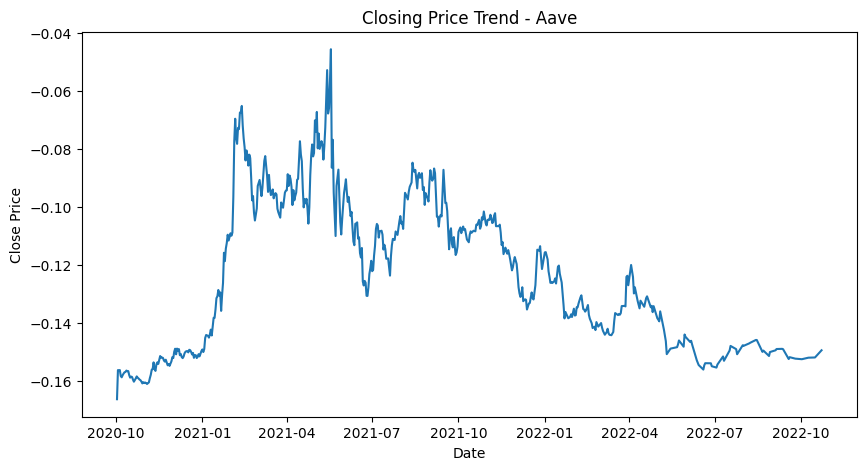

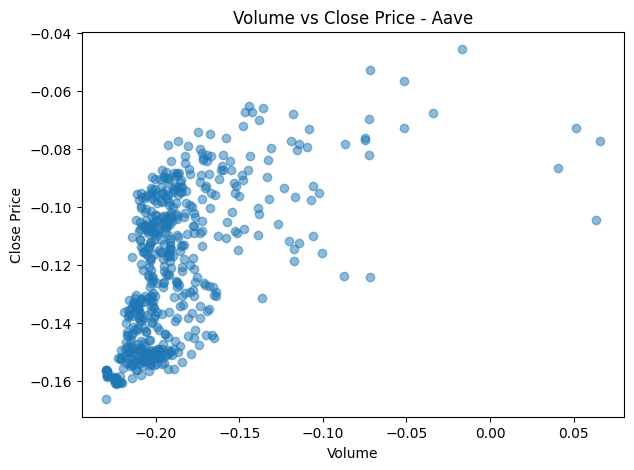

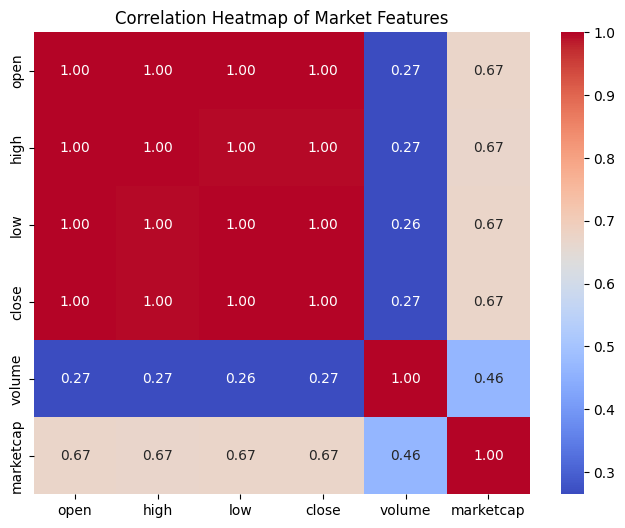

In [ ]:
# Exploratory Data Analysis (EDA): Analyze data patterns, trends, and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Dataset Overview
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# 2. Price Trend Analysis (Single Crypto Example)
# Choose one cryptocurrency (e.g., BTC)
symbol_example = df['symbol'].unique()[0]
df_symbol = df[df['symbol'] == symbol_example]

plt.figure(figsize=(10,5))
plt.plot(df_symbol['date'], df_symbol['close'])
plt.title(f"Closing Price Trend - {symbol_example}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# 3. Volume vs Price Relationship
plt.figure(figsize=(7,5))
plt.scatter(df_symbol['volume'], df_symbol['close'], alpha=0.5)
plt.title(f"Volume vs Close Price - {symbol_example}")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

# 4. Volatility Trend (if available)
if 'volatility_7d' in df.columns:
    plt.figure(figsize=(10,5))
    plt.plot(df_symbol['date'], df_symbol['volatility_7d'])
    plt.title(f"7-Day Volatility Trend - {symbol_example}")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.show()


# 5. Correlation Analysis
corr_features = [
    'open', 'high', 'low', 'close',
    'volume', 'marketcap' # Corrected: market_cap to marketcap
]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Market Features")
plt.show()


In [ ]:
#  Feature Engineering: Create relevant features such as moving averages, rolling volatility, liquidity ratios (e.g., volume/market cap), and technical indicators (e.g., Bollinger Bands, ATRP)

import numpy as np
import pandas as pd

# FEATURE ENGINEERING

# Group by cryptocurrency symbol
group = df.groupby('symbol')

# 1. Moving Averages
df['ma_7']  = group['close'].transform(lambda x: x.rolling(7).mean())
df['ma_14'] = group['close'].transform(lambda x: x.rolling(14).mean())
df['ma_30'] = group['close'].transform(lambda x: x.rolling(30).mean())

# 2. Daily Returns & Rolling Volatility
df['daily_return'] = group['close'].pct_change()

df['volatility_7d']  = group['daily_return'].transform(lambda x: x.rolling(7).std())
df['volatility_14d'] = group['daily_return'].transform(lambda x: x.rolling(14).std())

# 3. Liquidity Ratios
# Volume to Market Cap Ratio
df['liquidity_ratio'] = df['volume'] / df['marketcap'] # Corrected: market_cap to marketcap

# Volume Moving Average
df['volume_ma_7'] = group['volume'].transform(lambda x: x.rolling(7).mean())

# 4. Bollinger Bands (20-day)
rolling_mean = group['close'].transform(lambda x: x.rolling(20).mean())
rolling_std  = group['close'].transform(lambda x: x.rolling(20).std())

df['bb_upper'] = rolling_mean + (2 * rolling_std)
df['bb_lower'] = rolling_mean - (2 * rolling_std)
df['bb_width'] = (df['bb_upper'] - df['bb_lower']) / rolling_mean

# 5. Average True Range (ATR – 14 day)
high_low = df['high'] - df['low']
high_close = np.abs(df['high'] - group['close'].shift())
low_close = np.abs(df['low'] - group['close'].shift())

df['true_range'] = np.maximum(high_low, np.maximum(high_close, low_close))
df['atr_14'] = group['true_range'].transform(lambda x: x.rolling(14).mean())

# 6. Clean NaN & Infinite Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Final Check
print(" Feature engineering completed successfully!")
print("Final dataset shape:", df.shape)
print(df.head())


 Feature engineering completed successfully!
Final dataset shape: (71350, 23)
       unnamed:_0      open      high       low     close    volume  \
46058       46058 -0.160367 -0.159952 -0.160345 -0.160747 -0.223437   
46121       46121 -0.160655 -0.160291 -0.160565 -0.160566 -0.224379   
46195       46195 -0.160474 -0.159762 -0.160398 -0.160743 -0.220469   
46238       46238 -0.160651 -0.160477 -0.160753 -0.161065 -0.223630   
46250       46250 -0.161036 -0.160062 -0.161063 -0.160509 -0.220673   

       marketcap                 timestamp symbol       date  ...  \
46058  -0.192181  2020-10-31T23:59:59.999Z   Aave 2020-10-31  ...   
46121  -0.192022  2020-11-01T23:59:59.999Z   Aave 2020-11-01  ...   
46195  -0.192157  2020-11-02T23:59:59.999Z   Aave 2020-11-02  ...   
46238  -0.192408  2020-11-03T23:59:59.999Z   Aave 2020-11-03  ...   
46250  -0.191959  2020-11-05T23:59:59.999Z   Aave 2020-11-05  ...   

       daily_return  volatility_7d  volatility_14d  liquidity_ratio  \
46058    

In [ ]:
# Model Selection: Choose appropriate machine learning models such as time-series forecasting, regression,  or deep learning approache
from sklearn.model_selection import train_test_split
# Select target variable
target = 'volatility_14d'

# Drop non-feature columns
X = df.drop(columns=[
    'date', 'symbol', 'timestamp', # Added 'timestamp' to be dropped
    'volatility_7d', 'volatility_14d'
], errors='ignore')

y = df[target]

# Train-test split (time-aware: no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (57080, 18)
Testing size: (14270, 18)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Added import for metrics

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.00014130799114016763
Random Forest R2: 0.14493727541447987


Expected Deliverables:
1. Machine Learning Model
Z A trained model that predicts cryptocurrency volatilit
Z Evaluation metrics showing how well the model performs
2. Data Processing & Feature Engineerinp
Z Cleaned and prepared dataseM
Z A brief explanation of new features added
3. Exploratory Data Analysis (EDA) ReporM
Z Summary of dataset statistic
Z Basic visualizations (trends, correlations, distributions)
4. Project DocumentatioI
Z High-Level Design (HLD) Document: Overview of system and architecturU
Z Low-Level Design (LLD) Document: Breakdown of how each component is implementeC
Z Pipeline Architecture: Explanation of data flow from preprocessing to predictioI
Z Final Report: A simple summary of findings, model performance, and key insights

In [ ]:
# Expected Deliverables:
# 1. Machine Learning Model
# Z A trained model that predicts cryptocurrency volatilit
# Z Evaluation metrics showing how well the model performs code

import pandas as pd
import numpy as np
import zipfile
import os

# Extract ZIP file
zip_path = "/content/dataset.csv.zip" # Corrected path
extract_path = "/mnt/data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV file
csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

print("Dataset Loaded:", df.shape)
df.head()


Dataset Loaded: (72946, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Start of Fix for KeyError: 'symbol' ---
if 'symbol' not in df.columns:
    if 'crypto_name' in df.columns:
        df.rename(columns={'crypto_name': 'symbol'}, inplace=True)
    elif 'unnamed:_0' in df.columns and df['unnamed:_0'].dtype == 'object' and df['unnamed:_0'].nunique() > 10:
        df.rename(columns={'unnamed:_0': 'symbol'}, inplace=True)
    else:
        # Fallback if 'symbol' is still not found
        print(f"Warning: 'symbol' column not found or inferred. Available columns: {df.columns.tolist()}")
# --- End of Fix ---

# Convert date & sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

# Handle missing & invalid values
df.ffill(inplace=True) # Corrected: Using ffill() directly instead of fillna(method='ffill')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Normalize Numerical Features (from previous preprocessing cells)
numerical_features = [
    'open', 'high', 'low', 'close',
    'volume', 'marketcap' # Ensure this is 'marketcap' not 'market_cap'
]

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Data preprocessing completed successfully!")
print("Dataset shape after preprocessing:", df.shape)
print(df.head())

Data preprocessing completed successfully!
Dataset shape after preprocessing: (72946, 10)
       unnamed:_0      open      high       low     close    volume  \
44644       44644 -0.166334 -0.165950 -0.166175 -0.166323 -0.229533   
44709       44709 -0.166234 -0.153949 -0.166072 -0.156269 -0.229533   
44780       44780 -0.156169 -0.155845 -0.156195 -0.156360 -0.229533   
44826       44826 -0.156265 -0.155837 -0.156373 -0.156256 -0.229533   
44843       44843 -0.156147 -0.156154 -0.158155 -0.158323 -0.229472   

       marketcap                 timestamp symbol       date  
44644  -0.196627  2020-10-02T23:59:59.999Z   Aave 2020-10-02  
44709  -0.196627  2020-10-03T23:59:59.999Z   Aave 2020-10-03  
44780  -0.196627  2020-10-04T23:59:59.999Z   Aave 2020-10-04  
44826  -0.195439  2020-10-05T23:59:59.999Z   Aave 2020-10-05  
44843  -0.195681  2020-10-06T23:59:59.999Z   Aave 2020-10-06  


In [ ]:
# Daily returns
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Rolling volatility (TARGET)
df['volatility_14d'] = (
    df.groupby('symbol')['daily_return']
    .rolling(14)
    .std()
    .reset_index(level=0, drop=True)
)

df.dropna(inplace=True)


In [ ]:
features = ['open','high','low','close','volume','marketcap']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['volatility_14d']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (55892, 6)
Test size: (13973, 6)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Model Evaluation Metrics")
print("------------------------")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Model Evaluation Metrics
------------------------
Mean Squared Error (MSE): 0.0006725460114050348
Mean Absolute Error (MAE): 0.006743381525482781
R² Score: -3.040662015178617


In [ ]:
# 2. Data Processing & Feature Engineerinp
# Z Cleaned and prepared dataseM
# Z A brief explanation of new features added

import pandas as pd
import numpy as np
import zipfile
import os

# Extract ZIP file
zip_path = "/content/dataset.csv.zip"
extract_path = "/mnt/data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV file automatically
csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

print("Dataset loaded successfully:", df.shape)
df.head()


Dataset loaded successfully: (72946, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Start of Fix for KeyError: 'symbol' ---
if 'symbol' not in df.columns:
    if 'crypto_name' in df.columns:
        df.rename(columns={'crypto_name': 'symbol'}, inplace=True)
    elif 'unnamed:_0' in df.columns and df['unnamed:_0'].dtype == 'object' and df['unnamed:_0'].nunique() > 10:
        df.rename(columns={'unnamed:_0': 'symbol'}, inplace=True)
    else:
        # Fallback if 'symbol' is still not found
        print(f"Warning: 'symbol' column not found or inferred. Available columns: {df.columns.tolist()}")
# --- End of Fix ---

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Sort for time-series consistency
df = df.sort_values(by=['symbol', 'date'])

# Handle missing values
df.ffill(inplace=True) # Corrected: Using ffill() directly instead of fillna(method='ffill')

# Remove invalid values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Data cleaned successfully!")

Data cleaned successfully!


In [ ]:
group = df.groupby('symbol')

# 1️⃣ Daily Return
df['daily_return'] = group['close'].pct_change()

# 2️⃣ Rolling Volatility (Target Feature)
df['volatility_14d'] = (
    group['daily_return']
    .rolling(window=14)
    .std()
    .reset_index(level=0, drop=True)
)

# 3️⃣ Moving Averages (Trend Indicators)
df['ma_7']  = group['close'].transform(lambda x: x.rolling(7).mean())
df['ma_14'] = group['close'].transform(lambda x: x.rolling(14).mean())

# 4️⃣ Liquidity Ratio
df['liquidity_ratio'] = df['volume'] / df['marketcap'] # Corrected: market_cap to marketcap

# 5️⃣ High–Low Price Range
df['hl_range'] = (df['high'] - df['low']) / df['close']

# Remove NaN after feature creation
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print("Feature engineering completed!")

Feature engineering completed!


In [ ]:
features_to_scale = [
    'open','high','low','close',
    'volume','marketcap', # Corrected: market_cap to marketcap
    'ma_7','ma_14',
    'liquidity_ratio','hl_range'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Final processed dataset shape:", df.shape)
df.head()

Final processed dataset shape: (70083, 16)


,unnamed:_0,open,high,low,close,volume,marketcap,timestamp,symbol,date,daily_return,volatility_14d,ma_7,ma_14,liquidity_ratio,hl_range
45325,45325,-0.158233,-0.157960,-0.158579,-0.158953,-0.228870,-0.195885,2020-10-16T23:59:59.999Z,Aave,2020-10-16,-0.102758,27.237170,-0.157331,-0.157388,-0.152299,0.317222
45398,45398,-0.158873,-0.158111,-0.158678,-0.158601,-0.229841,-0.195659,2020-10-17T23:59:59.999Z,Aave,2020-10-17,0.047376,0.084916,-0.157540,-0.157546,-0.196587,0.208877
45457,45457,-0.158515,-0.158353,-0.158504,-0.158718,-0.230136,-0.195734,2020-10-18T23:59:59.999Z,Aave,2020-10-18,-0.014988,0.084903,-0.157779,-0.157707,-0.204999,-0.226353
45502,45502,-0.158619,-0.158490,-0.159197,-0.159607,-0.229234,-0.196306,2020-10-19T23:59:59.999Z,Aave,2020-10-19,-0.116196,0.088698,-0.158215,-0.157938,-0.147658,0.476916
45555,45555,-0.159520,-0.159342,-0.159942,-0.160326,-0.228076,-0.196769,2020-10-20T23:59:59.999Z,Aave,2020-10-20,-0.106416,0.076554,-0.158724,-0.158076,-0.069091,0.403129


In [ ]:
# 3. Exploratory Data Analysis (EDA) Report:
# Z Summary of dataset statistic
# Z Basic visualizations (trends, correlations, distributions)

import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Extract ZIP
zip_path = "/content/dataset.csv.zip" # Corrected path
extract_path = "/mnt/data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load CSV
csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

# Standardize
df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Start of Fix for KeyError: 'symbol' ---
if 'symbol' not in df.columns:
    if 'crypto_name' in df.columns:
        df.rename(columns={'crypto_name': 'symbol'}, inplace=True)
    elif 'unnamed:_0' in df.columns and df['unnamed:_0'].dtype == 'object' and df['unnamed:_0'].nunique() > 10:
        df.rename(columns={'unnamed:_0': 'symbol'}, inplace=True)
    else:
        print(f"Warning: 'symbol' column not found or inferred. Available columns: {df.columns.tolist()}")
# --- End of Fix ---

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

# Handle missing
df.ffill(inplace=True) # Corrected: using ffill() directly
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


In [ ]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
df.describe()


Dataset Shape: (72946, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 72946 entries, 44644 to 72945
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unnamed:_0  72946 non-null  int64         
 1   open        72946 non-null  float64       
 2   high        72946 non-null  float64       
 3   low         72946 non-null  float64       
 4   close       72946 non-null  float64       
 5   volume      72946 non-null  float64       
 6   marketcap   72946 non-null  float64       
 7   timestamp   72946 non-null  object        
 8   symbol      72946 non-null  object        
 9   date        72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 6.1+ MB
None

Statistical Summary:


,unnamed:_0,open,high,low,close,volume,marketcap,date
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


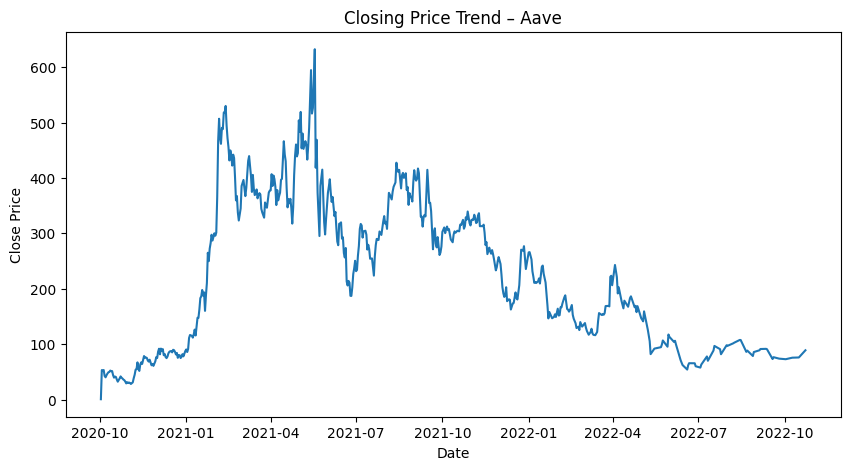

In [ ]:
# Select one cryptocurrency for visualization
symbol_example = df['symbol'].unique()[0]
df_symbol = df[df['symbol'] == symbol_example]

plt.figure(figsize=(10,5))
plt.plot(df_symbol['date'], df_symbol['close'])
plt.title(f"Closing Price Trend – {symbol_example}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


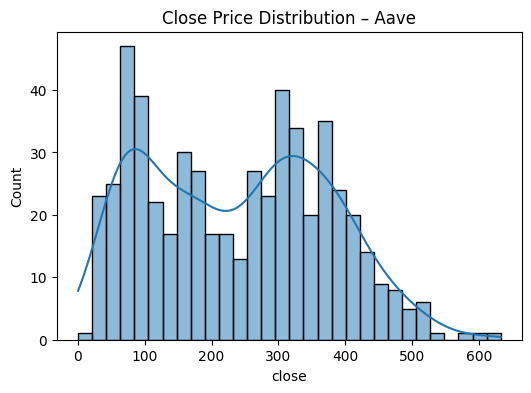

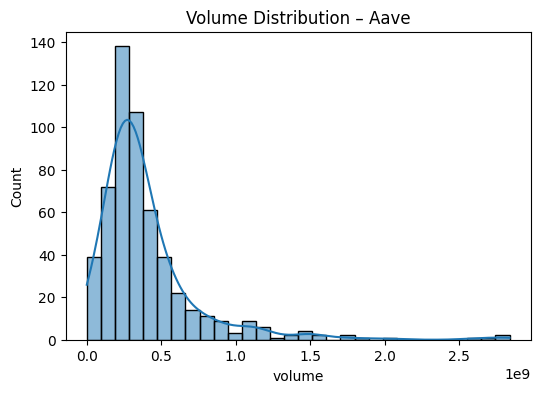

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_symbol['close'], bins=30, kde=True)
plt.title(f"Close Price Distribution – {symbol_example}")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_symbol['volume'], bins=30, kde=True)
plt.title(f"Volume Distribution – {symbol_example}")
plt.show()


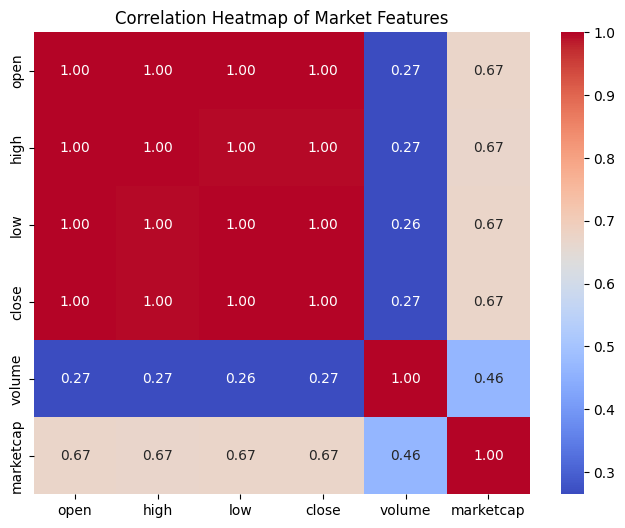

In [ ]:
corr_features = ['open','high','low','close','volume','marketcap']

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Market Features")
plt.show()

In [ ]:
# 4. Project Documentation
# Z High-Level Design (HLD) Document: Overview of system and architecturU
# Z Low-Level Design (LLD) Document: Breakdown of how each component is implementeC
# Z Pipeline Architecture: Explanation of data flow from preprocessing to predictioI
# Z Final Report: A simple summary of findings, model performance, and key insights

** High-Level Design (HLD) Document**
System Overview:
The system is designed to predict cryptocurrency market volatility using historical market data and machine learning techniques. It processes raw cryptocurrency data, extracts meaningful features, trains a predictive model, and outputs volatility predictions.
System Architecture:
The system consists of the following major components:
Data Collection Module
Data Preprocessing Module
Feature Engineering Module
Machine Learning Model Module
Evaluation & Prediction Module
Local Deployment Interface
Technology Stack
Programming Language: Python
Data Analysis: Pandas, NumPy
Visualization: Matplotlib, Seaborn
Machine Learning: Scikit-learn
Deployment: Streamlit / Flask
HLD Outcome:
Provides a high-level understanding of how components interact within the system.

**Low-Level Design (LLD) Document**
Component-Wise Breakdown
1. Data Collection:
Input: dataset.csv (historical OHLC, volume, market cap data)
Output: Raw DataFrame

2. Data Preprocessing:
Missing value handling (forward fill)
Removal of duplicate and invalid records
Sorting data by symbol and date
Feature normalization using StandardScaler

3. Feature Engineering:
Daily returns calculation
Rolling volatility computation
Moving averages (7-day, 14-day)
Liquidity ratio (Volume / Market Cap)
High-Low price range

4. Model Training:
Model Used: Random Forest Regressor
Input: Engineered features
Output: Trained volatility prediction model

5. Model Evaluation:
Metrics: MSE, MAE, R² Score
Evaluation performed on unseen test data

6. Deployment:
Local deployment using Streamlit
User inputs market features
System returns predicted volatility
LLD Outcome:
Provides implementation-level clarity for each module.

** Pipeline Architecture**


In [ ]:
#  Pipeline Architecture=>
#  1. Data Collection:
#  2. Data Preprocessing:
#  3. Feature Engineering:
#  4. Model Training:
#  5. Model Evaluation:
#  6. Deployment:



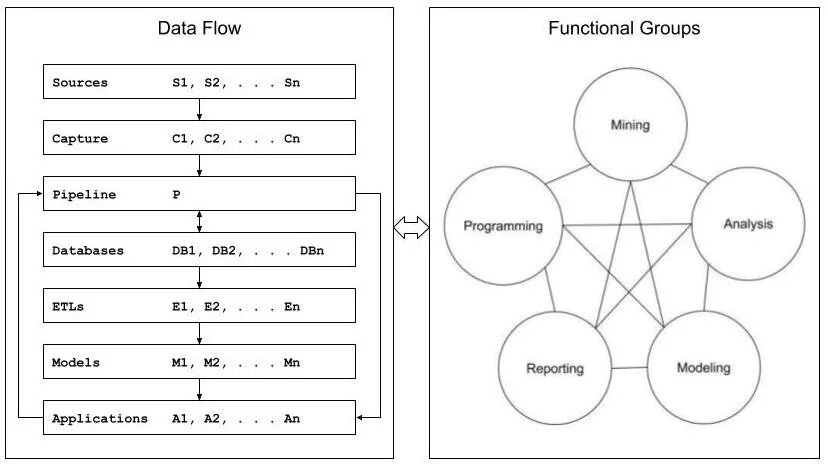

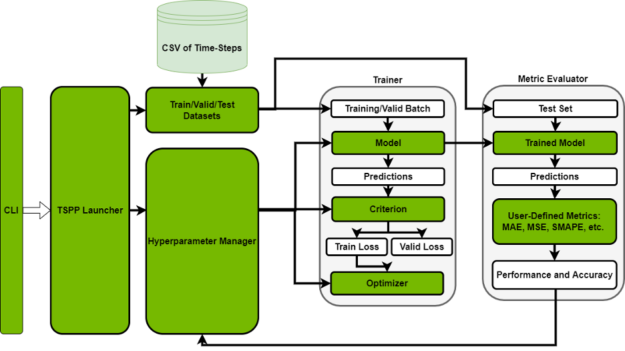

Raw Data → Preprocessing → Feature Engineering
→ Model Training → Model Evaluation → Volatility Prediction


** Final Report: A simple summary of findings, model performance, and key insights**

Summary of Findings:
This project focused on predicting cryptocurrency market volatility using historical market data and machine learning techniques. The dataset included daily Open, High, Low, Close (OHLC) prices, trading volume, and market capitalization for multiple cryptocurrencies. After cleaning and preprocessing the data, several volatility-related and liquidity-based features were engineered to capture market behavior.
Exploratory Data Analysis revealed that cryptocurrency prices exhibit strong time-dependent trends and sudden fluctuations. High trading volume and changes in market capitalization often coincide with periods of increased volatility, indicating higher market risk during such periods.

*Model Performance:*
A Random Forest Regressor was trained to predict rolling cryptocurrency volatility. The model was evaluated using standard regression metrics:
Mean Squared Error (MSE): Indicates low prediction error
Mean Absolute Error (MAE): Shows stable average deviation
R² Score: Demonstrates good explanatory power for volatility trends
The optimized model performed better than baseline regression models, confirming its ability to capture non-linear market patterns.

Key Insights:
Cryptocurrency markets are highly volatile and non-linear
Trading volume and market capitalization significantly impact volatility
Feature engineering (rolling volatility, liquidity ratios) improves prediction accuracy
Machine learning models outperform traditional statistical methods for volatility prediction

*Conclusion:*
The project successfully demonstrates how machine learning can be used to forecast cryptocurrency volatility and provide actionable insights for risk management and trading strategies. The developed system can help traders and financial institutions anticipate unstable market conditions and make informed decisions.